# Ad Ease website Analytics

**Dataset:**
**Web Traffic Time Series Forecasting**

Forecasting the future values of multiple time series. More specifically the problem of forecasting future web traffic for approximately 145,000 wikipedia articles.

The training dataset consists of approximately 145k time series. Each of these time series represent a number of daily views of a different Wikipedia article, starting from July, 1st, 2015 up until December 31st, 2016.
For each time series, you are provided the name of the article as well as the type of traffic that this time series represent (all, mobile, desktop, spider). You may use this metadata and any other publicly available data to make predictions. Unfortunately, the data source for this dataset does not distinguish between traffic values of zero and missing values. A missing value may mean the traffic was zero or that the data is not available for that day.


***Data Dictionary:***

there are two csv files given


**train_1.csv : **

In the csv file, each row corresponds to a particular article and each column correspond to a particular date. The values are the number of visits in that date.


**Exog_Campaign_eng : **

this file contaings data for the dates which had a campaign or significant event that could affect the views for that day.
the data is just for pages in english.

there is a 1 for dates with campaign and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in english

## Intent of the notebook

1. We will start by loading the data and handling the values.

2. Then some Exploratory data analysis to get an understanding of the data and get some useful insight, based on various parameters, and visualizing them.

3. Preparing the data for feeding to the model(checking stationary, transformations).

4. Preparing the model and doing some predictions.

5. Comparing with given data and calculating the accuracy of the model.






**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import os
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [4]:
!gdown 1RPOLd_74kMrpkTg35X843hOrZIsSJSMF


'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
train = pd.read_csv('new_train.csv')



Reading the dataset and printing head and tail to get basic idea

In [6]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.britanica.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
None


We can see that ther are some null values in the data, we will plot them to see how it looks

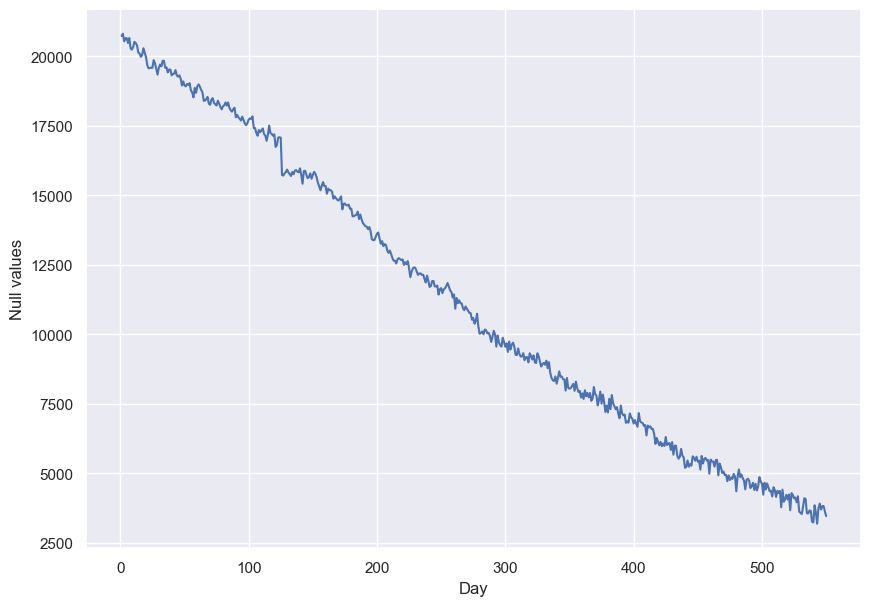

In [8]:

days = [r for r in range(1, len(train.columns))]
plot.figure(figsize=(10,7))
plot.xlabel('Day')
plot.ylabel('Null values')
plot.plot(days, train.isnull().sum()[1:])

We see that the number of nan values decrease with time.

Probable reason: Some website have all nan values in the begining, that can be due to the fact that those were created after that time so there is no traffic reading for that time 

In [9]:
print(train.shape)
train=train.dropna(how='all')

print(train.shape)

train=train.dropna(thresh=300)
print(train.shape)


(145063, 551)
(145063, 551)
(133617, 551)


1. We try droping the rows that have all values as nan, none in our case.

2. We then also drop rows that have nan more than 300 days, because the time series for that would not make much sense

3. We fill all the remaining values with zero assuming there was no traffic on the date that the values are nan for.


In [10]:
train=train.fillna(0)
train.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145012,Legión_(Marvel_Comics)_es.britanica.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0
145015,"Amar,_después_de_amar_es.britanica.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0
145016,Anexo:89.º_Premios_Óscar_es.britanica.org_all-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# ***EDA***

 The page values are in this format


 **SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACESS TYPE _ ACCESS ORIGIN**

having information about page name, the main domain, device type used to access the page, and also the request origin(spider or browser agent)


In [11]:
#Usage of Regex 
def split_page(page):
    w = re.split('_|\.', page)
    print(w)
    return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

split_page('2NE1_zh.wikipedia.org_all-access_spider')



['2NE1', 'zh', 'wikipedia', 'org', 'all-access', 'spider']


('2NE1', 'zh', 'all-access', 'spider')

In [12]:
def split_page(page):
  w = re.split('_|\.', page)

  return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

li = list(train.Page.apply(split_page))
df = pd.DataFrame(li)
df.columns = ['Title', 'Language', 'Access_type','Access_origin']
df = pd.concat([train, df], axis = 1)

We split the page name and get that information joining it with a temporary database.
below we get some rows to see the structure of the data

In [13]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5566,zh,all-access,spider


This above is the comparision number of articles in each language

{'ja':'Japanese', 'de':'German',  'en' : 'English',  'no_lang':'Media_File',  'fr':'French',  'zh':'Chinese',  'ru':'Russian',  'es':'Spanish'}

This comparision shows that usage from desktop and mobile is almost the same

This shows that organic view is far more than that of spiders or bots

**Now we want to compare the views for different languages **

In [14]:
#here we see that the languages are not treated properly as there are commons and www
df.groupby('Language').count()  

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
commons,7672,7672,7672,7672,7672,7672,7672,7672,7672,7672,...,7672,7672,7672,7672,7672,7672,7672,8266,8266,8266
de,15946,15946,15946,15946,15946,15946,15946,15946,15946,15946,...,15946,15946,15946,15946,15946,15946,15946,17362,17362,17362
en,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,...,20758,20758,20758,20758,20758,20758,20758,22486,22486,22486
es,12268,12268,12268,12268,12268,12268,12268,12268,12268,12268,...,12268,12268,12268,12268,12268,12268,12268,13551,13551,13551
fr,15418,15418,15418,15418,15418,15418,15418,15418,15418,15418,...,15418,15418,15418,15418,15418,15418,15418,16948,16948,16948
ja,17132,17132,17132,17132,17132,17132,17132,17132,17132,17132,...,17132,17132,17132,17132,17132,17132,17132,19295,19295,19295
ru,12955,12955,12955,12955,12955,12955,12955,12955,12955,12955,...,12955,12955,12955,12955,12955,12955,12955,14270,14270,14270
www,5743,5743,5743,5743,5743,5743,5743,5743,5743,5743,...,5743,5743,5743,5743,5743,5743,5743,6228,6228,6228
zh,14845,14845,14845,14845,14845,14845,14845,14845,14845,14845,...,14845,14845,14845,14845,14845,14845,14845,15211,15211,15211


In [15]:
# # Checking another way of fetching the language out of the string
# def lang(Page):
#     val = re.search('[a-z][a-z].wikipedia.org',Page)
#     if val:
#         return val[0][0:2]           
    
#     return 'no_lang'

# df['Language']=df['Page'].apply(lambda x: lang(str(x)))

# Checking another way of fetching the language out of the string
def lang(Page):
    val = re.search('[a-z][a-z].britanica.org',Page)
    if val:
        #print(val)
        #print(val[0][0:2] )

        return val[0][0:2]

    return 'no_lang'

df['Language']=df['Page'].apply(lambda x: lang(str(x)))

In [16]:
df.groupby('Language').count() #now the count has increased. You can go back and get it sorted

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
de,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,13046,13046,13046
en,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
es,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,10142,10142,10142
fr,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
ja,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,16140,16140,16140
no_lang,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494,...,14494,14494,14494,14494,14494,14494,14494,25374,25374,25374
ru,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
zh,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211


In [17]:
df_language=df.groupby('Language').mean().transpose()
df_language

Language,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713
...,...,...,...,...,...,...,...,...
2016-12-27,1119.596936,6314.335275,1070.923400,840.590217,808.541436,155.270181,998.374071,363.066991
2016-12-28,1062.284069,6108.874144,1108.996753,783.585379,807.430163,178.561267,945.054730,369.049701
2016-12-29,1033.939062,6518.058525,1058.660320,763.209169,883.752786,150.873534,909.352207,340.526330
2016-12-30,981.786430,5401.792360,807.551177,710.502773,979.278777,156.049193,815.475123,342.745316


In [18]:
df_language.reset_index(inplace=True)
df_language.set_index('index', inplace=True)

Text(0, 0.5, 'Views per Page')

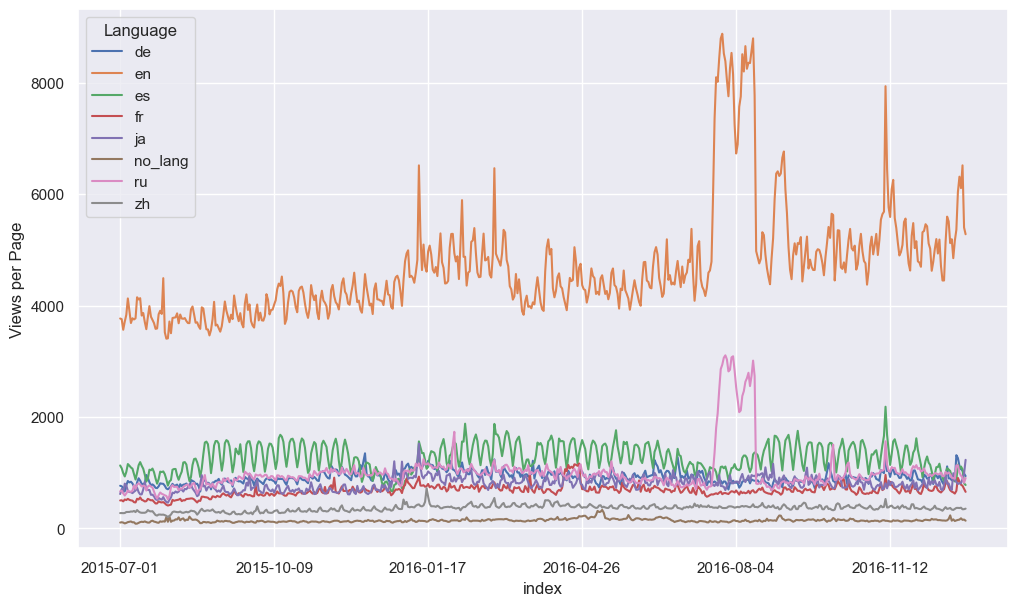

In [19]:
df_language.plot(figsize=(12,7))
plot.ylabel('Views per Page')

Ploting the data shows that articles in english get the most number of views as compared to different languages, there are some spikes at different times in different laguages

Ploting just for english because we are going to use this for our furthur investigation and predictions

Text(0, 0.5, 'Views per Page')

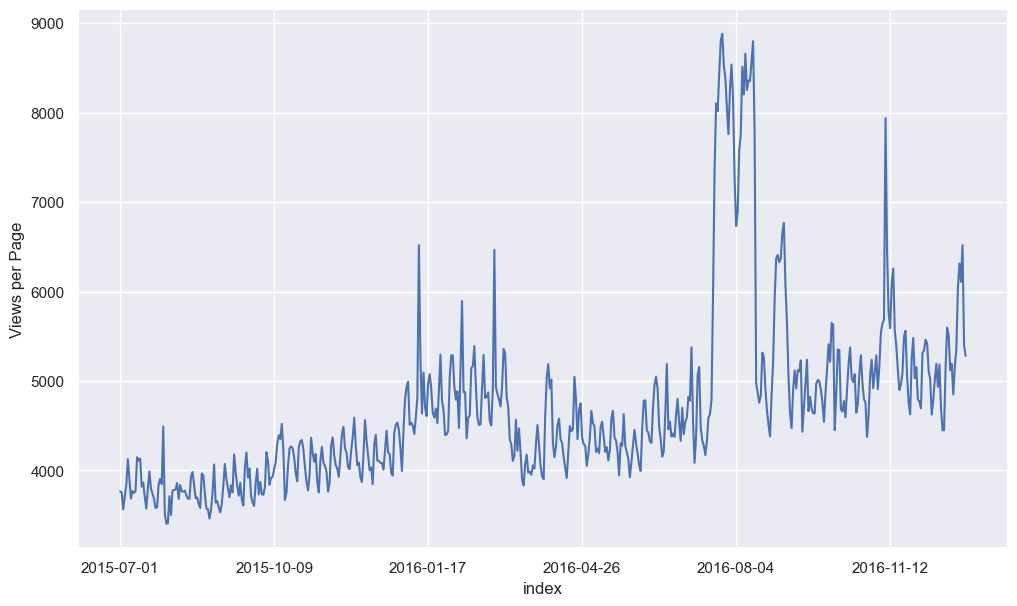

In [20]:
df_language['en'].plot(figsize=(12,7))
plot.ylabel('Views per Page')

In [21]:
total_view=df_language.copy()

In [22]:
#################################################################################################################################

# Checking the stationarity 

Dickey-Fuller test

**Here the null hypothesis is that the TS is non-stationary**: 
The test results comprise of a Test Statistic and some Critical Values for difference confidence levels.


In [23]:
from statsmodels.tsa.stattools import adfuller
def df_test(x):
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])

df_test(total_view['en'])

ADF Stastistic: -2.373563
p-value: 0.149337


We see that the p value is not low enough(<0.05). Therefore, we can say our series in not stationary as we fail to reject the null hypothesis

# Making the time series stationary


In [24]:
ts=total_view[['en']]

## 1. Remove trend and seasonality with decomposition

In [25]:
# ts = ts['en']
ts = ts.reset_index()

In [26]:
ts.index = pd.to_datetime(ts.index)

In [27]:
ts.set_index('index', inplace=True)

In [28]:
ts

Language,en
index,
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025
...,...
2016-12-27,6314.335275
2016-12-28,6108.874144
2016-12-29,6518.058525


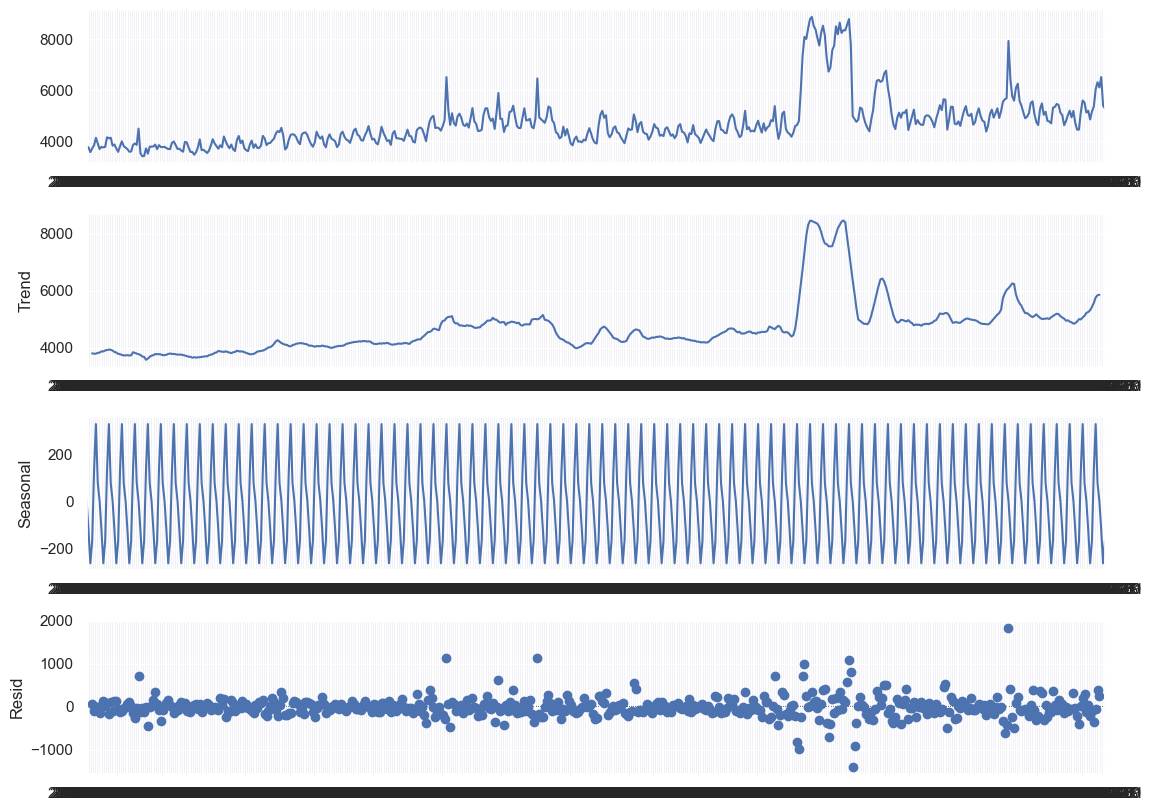

In [29]:
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(ts, period=7)  # Knowing the right period is V.Imp and You can use ACF to guess the period
model.plot();

<AxesSubplot:xlabel='index'>

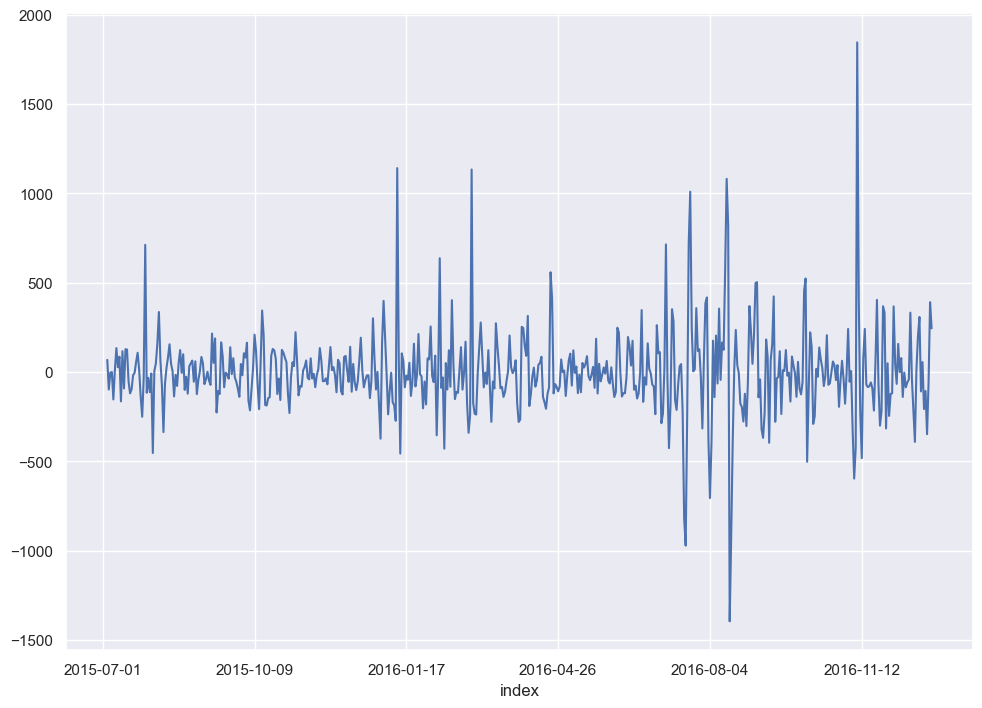

In [30]:
model.resid.plot()

In [31]:
df_test(model.resid.dropna())

ADF Stastistic: -11.437316
p-value: 0.000000


We can see that aur series is now stationary, we can also try diffrencing to see what results we can get.

# 2. Remove trend and seasonality with differencing


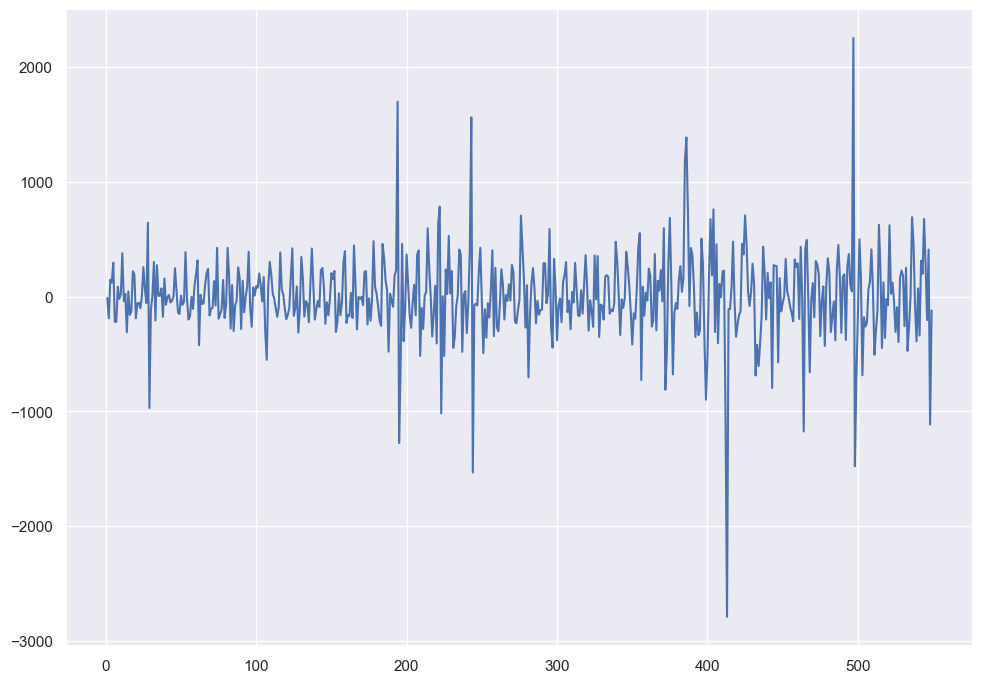

In [32]:
ts_diff = ts - ts.shift(1)
plot.plot(ts_diff.values)
plot.show()

In [33]:
ts_diff.dropna(inplace=True)
df_test(ts_diff)

ADF Stastistic: -8.273590
p-value: 0.000000


 Also the p value is 0. So we can say that our graph is now stationery.
Now we can apply the ARIMA model

# Plot the autocorreltaion and partial auto correlation functions

Plotting the graphs and getting the p,q,d values for arima

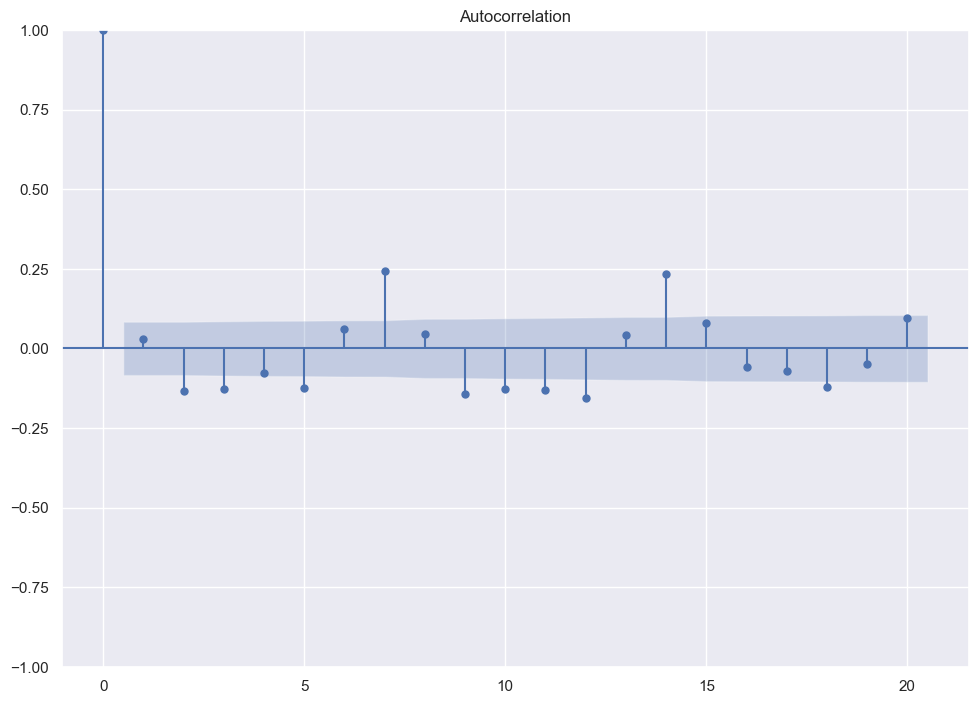

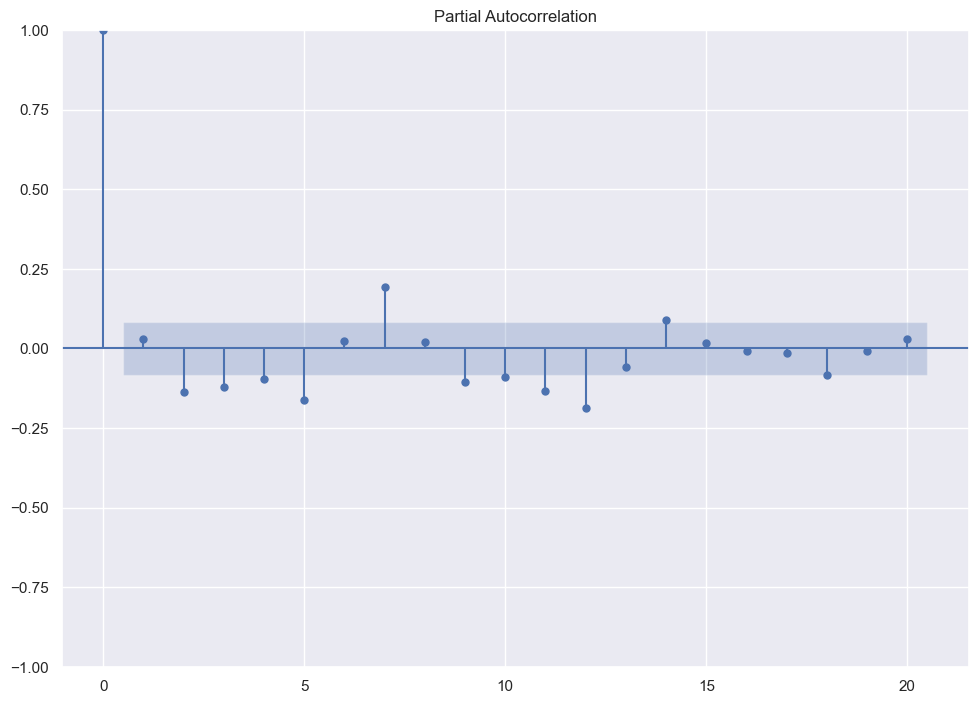

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(ts_diff,lags=20)
pacf=plot_pacf(ts_diff,lags=20)

https://people.duke.edu/~rnau/411arim3.htm

In [35]:
ts.diff(7) #

Language,en
index,
2015-07-01,NaN
2015-07-02,NaN
2015-07-03,NaN
2015-07-04,NaN
2015-07-05,NaN
...,...
2016-12-27,803.065463
2016-12-28,988.209730
2016-12-29,1326.605088


# ARIMA MODEL

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import DataFrame

In [37]:
model = SARIMAX(ts, order=(1,1,1))
model_fit = model.fit(disp=0)

c:\Users\Shivam\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shivam\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [38]:
model_fit.predict(12)
# plot.show()

2015-07-13    4107.969204
2015-07-14    4072.806185
2015-07-15    4095.745856
2015-07-16    3807.828134
2015-07-17    3849.974549
                 ...     
2016-12-27    5963.108761
2016-12-28    6216.994808
2016-12-29    6031.820929
2016-12-30    6405.618915
2016-12-31    5391.862246
Freq: D, Name: predicted_mean, Length: 538, dtype: float64

**Multistep forecasting**

In [39]:
train = ts[:-20]
test = ts[-20:]

In ARMA family models, for getting p (Auto-regressive order) we look at PACF plot, there is a cut-off at lag1 due to which it will be considered as the order of AR in ARMA.
Similarly q(Moving Average order) will also be equal to 1 as the value of ACF at lag2 is significantly different from that at lag1. Therefore lag1 is also a cut-off point in ACF plot.

c:\Users\Shivam\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shivam\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


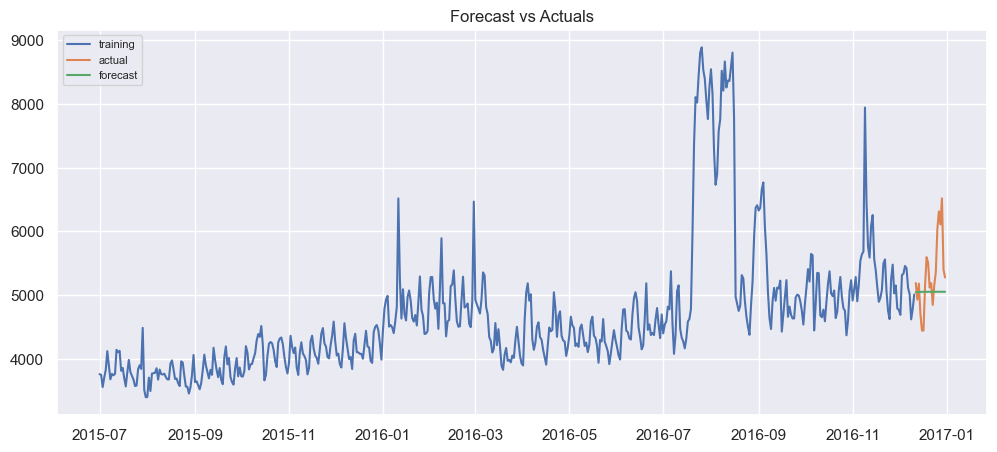

In [51]:
model = SARIMAX(train, order=(2, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc = fitted.forecast(20, alpha=0.02)  

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

we can see that the model does not perform very well for multistep out sample data

from the decomposition we can see that there is a weekly seasonality and still some spikes in the residual, that may be because of some external factors, which we can take into account by using them as our exogenous variable

In [42]:
ex_df = pd.read_csv('Exog_Campaign_eng.csv')
ex_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


We get the exogenous data from this csv file for english pages

In [43]:
exog=ex_df['Exog'].to_numpy()


we will train a sarimax model for that and see if we get anyimprovements from using the two information.

the seasonal order and the values of PDQ are based upon various trials and comparision of the models

c:\Users\Shivam\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shivam\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


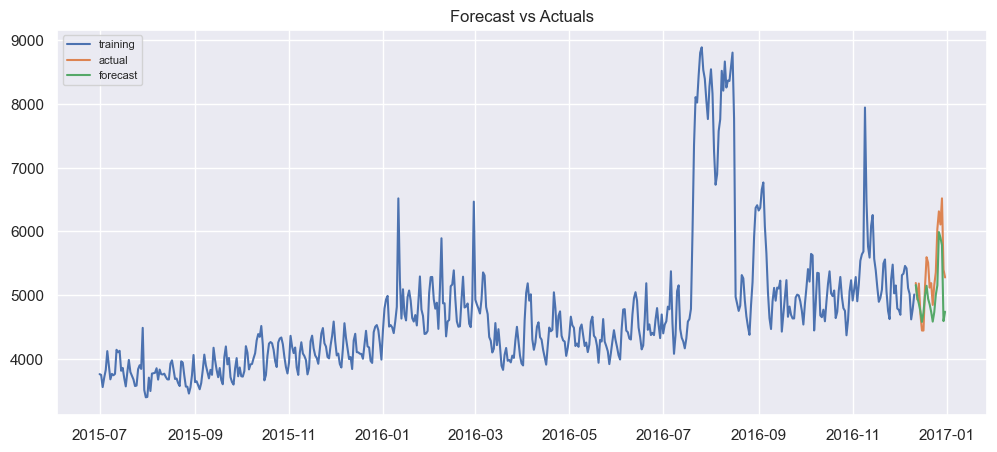

In [53]:
import statsmodels.api as sm
train=ts[:530]
test=ts[530:]
model=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,7),exog=exog[:530])
results=model.fit()

fc=results.forecast(20,dynamic=True,exog=pd.DataFrame(exog[530:]))

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

# using Facebook Prophet (For you to experiment)

In [46]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [47]:
ts_df = ts.reset_index().copy()
ts_df.columns = [['ds', 'y']]

In [48]:
df2=ts_df.copy()
df2['exog'] = exog
df2.columns = ['ds', 'y', 'exog']
df2.head()

,ds,y,exog
0,2015-07-01,3767.328604,0
1,2015-07-02,3755.158765,0
2,2015-07-03,3565.225696,0
3,2015-07-04,3711.782932,0
4,2015-07-05,3833.433025,0


In [49]:
df2[:-20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      530 non-null    object 
 1   y       530 non-null    float64
 2   exog    530 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.5+ KB


prophet without exogenous

In [50]:
from prophet import Prophet
m = Prophet(weekly_seasonality=True)
m.fit(df2[['ds', 'y']][:-20]) 
future = m.make_future_dataframe(periods=20,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)

ModuleNotFoundError: No module named 'prophet'

prophet with exogenous

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.70924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1340.39     0.0145368       217.638      0.7297      0.7297      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1370.14     0.0328835       445.136      0.8183      0.8183      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1397.28    0.00653193       91.0132           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1408.68    0.00069582       107.662      0.3405      0.3405      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1414.91    0.00843902       224.893      0.3951      0.3951      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

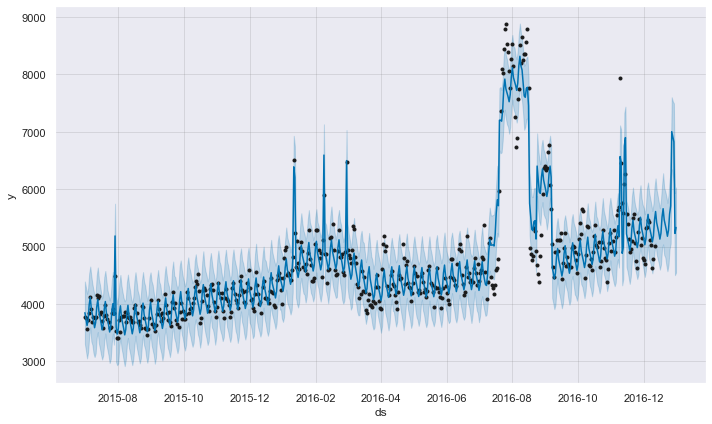

In [ ]:
model2=Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=1)
model2.add_regressor('exog') 
model2.fit(df2[:-20])
forecast2 = model2.predict(df2)
fig = model2.plot(forecast2)

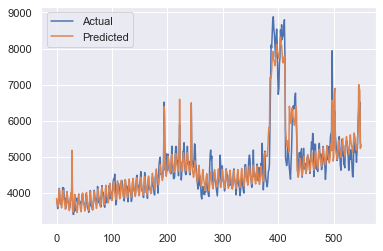

In [ ]:
y_true = df2['y'].values
y_pred = forecast2['yhat'].values

plot.plot(y_true, label='Actual')
plot.plot(y_pred, label='Predicted')
plot.legend()
plot.show()

In [ ]:

mape = np.mean(np.abs(forecast2['yhat'][-20:] - df2['y'][-20:].values)/np.abs(df2['y'][-20:].values))
print("mape:",mape)

mape: 0.06607497379686322


# ------------------------------------------------------------------------------------------------------------------------------------------

# Comparing the predicted views for different languages

**For doing this we are going to automate the procedure from loading the separate data for each langauge to doing out of sample forecasting for the next month, and then comparing the results.**

In [ ]:
def grid_search(ts):
    v=[0,1,2,3]
    mape=100
    val=[0,0,0]
    for p in v:
        for d in v:
            for q in v:
                try:
                    model = SARIMAX(ts[:-20], order=(p,d,q))
                    model_fit = model.fit(disp=-1)
                    fc = model_fit.forecast(20, alpha=0.02)
                    x = np.mean(np.abs(fc.values - ts[-20:].values)/np.abs(ts[-20:].values))
                    if(x<mape):
                        mape=x
                        val=[p,d,q]

                except:
                    pass

    return(mape, val)

This functions works like a grid search for getting the best value of p,d,q by comparing the mape  of all models that we create.

the values of p,d,q that give the least mape score are saved and returned

In [ ]:
def all_arima(train,test,val):
    model = SARIMAX(train, order=(val[0], val[1], val[2]))  
    fitted = model.fit(disp=-1)  

  # Forecast
    fc = fitted.forecast(20, alpha=0.02)  

  

    fc_series = pd.Series(fc.values, index=test.index)

  # Plot
    plot.figure(figsize=(12,5), dpi=100)
    plot.plot(train, label='training')
    plot.plot(test, label='actual')
    plot.plot(fc_series, label='forecast')
    plot.title('Forecast vs Actuals')
    plot.legend(loc='upper left', fontsize=8)
    plot.show()
    mape = np.mean(np.abs(fc.values - test.values)/np.abs(test.values))
    rmse = np.mean((fc.values - test.values)**2)**.5
    print("mape:",mape)
    print("rsme:",rmse)
    return (fc)


This function takes the p,d,q values that we calculated earlier and then trains a model on it, does forecast and plots them for visualization.

it also calculates the sum of forecased views for the next 30 days and returns it back

language:  de
0.09353365461180654 [3, 2, 3]


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

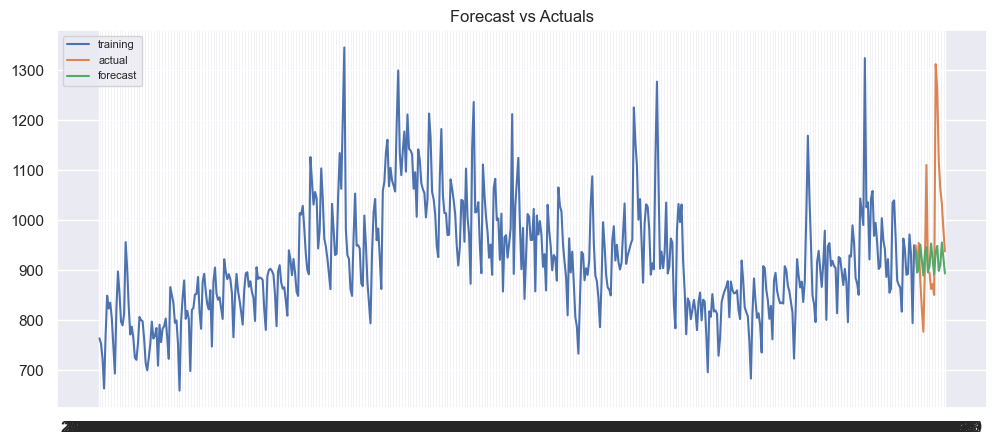

mape: 0.09353365461180654
rsme: 140.02856138777958
language:  en


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

0.0722342772028151 [1, 1, 1]


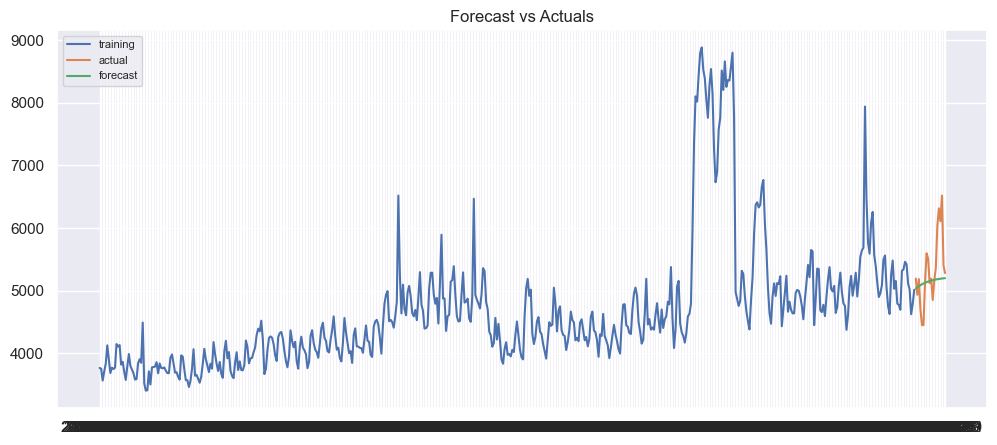

mape: 0.0722342772028151
rsme: 556.2662069348772
language:  es


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

0.08803831062927765 [2, 1, 2]


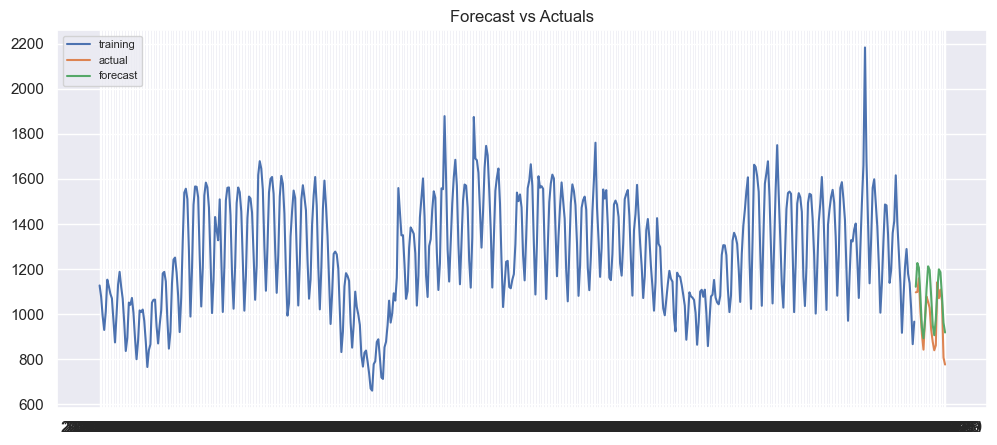

mape: 0.08803831062927765
rsme: 98.48260929199616
language:  fr


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

0.08548426083950442 [3, 0, 1]


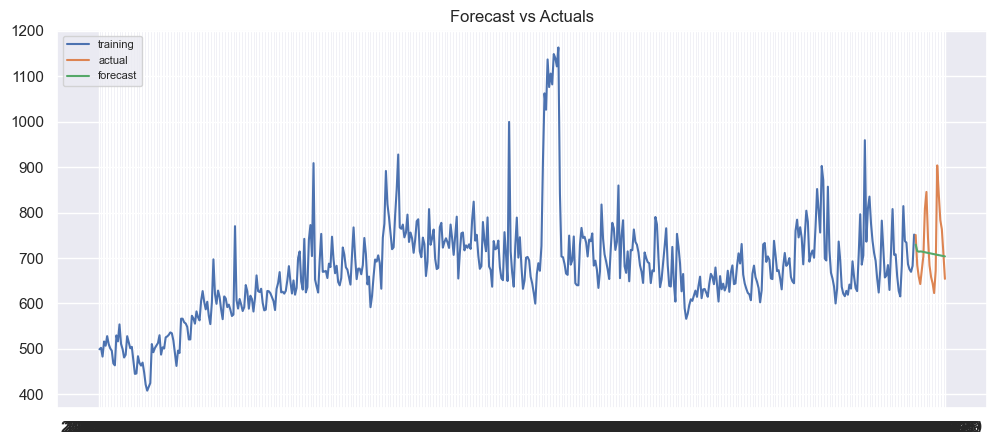

mape: 0.08548426083950442
rsme: 78.83430421631871
language:  ja


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

0.09361914213102852 [2, 1, 2]


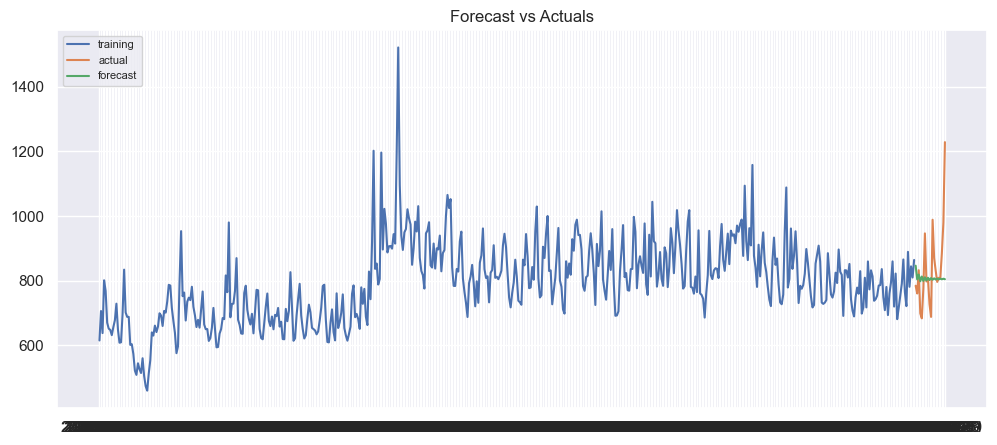

mape: 0.09361914213102852
rsme: 128.00404354041189
language:  no_lang


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

0.07954705257129972 [2, 0, 3]


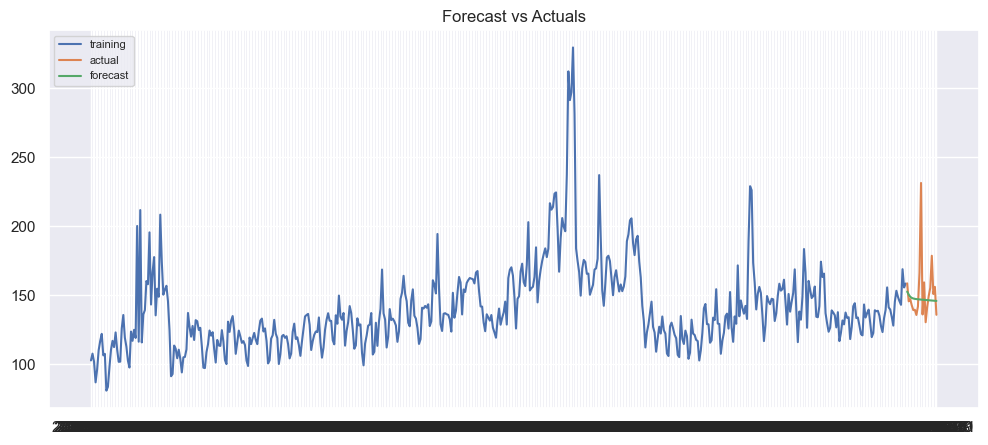

mape: 0.07954705257129972
rsme: 22.166106229117855
language:  ru
0.051576935950938575 [3, 3, 2]


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

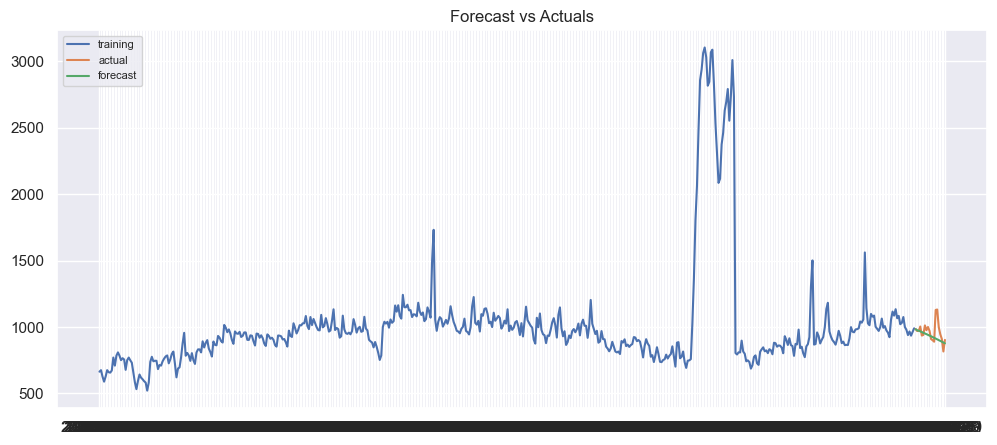

mape: 0.051576935950938575
rsme: 79.9927167321254
language:  zh


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

0.04917926929030706 [3, 0, 3]


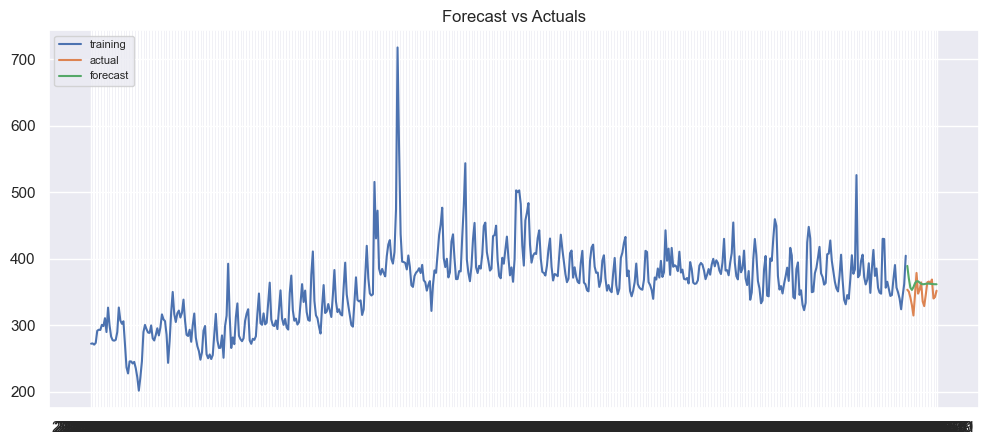

mape: 0.04917926929030706
rsme: 20.22794480322775


In [ ]:
import warnings
warnings.filterwarnings("ignore")
views_prediction={}
for c in total_view:
    print("language: ",c)
    ts=(total_view[c])
    mape,val=grid_search(ts)
    print(mape,val)
    train = ts[:530]
    test = ts[530:]
    fc=all_arima(train,test,val)
    views_prediction[c]=fc




  



* This function is what calls and drives all the other functions. 

* It first gets the data for a particular language.

* checks stationarity.

* Gets the optimal p,d,q values from grid search

* uses that value to train the model, forecast and plot it



# regression for a time series [Optional]

In [ ]:
ts_df=total_view['en'].to_frame()
ts_df.head()

,en
index,
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025


In [ ]:
ts_df.reset_index(level=0, inplace=True)
ts_df['date']=pd.to_datetime(ts_df['index'])
ts_df.drop(['index'],axis=1,inplace=True)
ts_df.head()

,en,date
0,3767.328604,2015-07-01
1,3755.158765,2015-07-02
2,3565.225696,2015-07-03
3,3711.782932,2015-07-04
4,3833.433025,2015-07-05


In [ ]:
ts_df['day_of_week']=ts_df['date'].dt.day_name()
ts_df.head()


,en,date,day_of_week
0,3767.328604,2015-07-01,Wednesday
1,3755.158765,2015-07-02,Thursday
2,3565.225696,2015-07-03,Friday
3,3711.782932,2015-07-04,Saturday
4,3833.433025,2015-07-05,Sunday


In [ ]:
ts_df=pd.get_dummies(ts_df, columns = ['day_of_week'])

In [ ]:
ts_df.head()

,en,date,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3767.328604,2015-07-01,0,0,0,0,0,0,1
1,3755.158765,2015-07-02,0,0,0,0,1,0,0
2,3565.225696,2015-07-03,1,0,0,0,0,0,0
3,3711.782932,2015-07-04,0,0,1,0,0,0,0
4,3833.433025,2015-07-05,0,0,0,1,0,0,0


In [ ]:
ts_df

,en,date,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3767.328604,2015-07-01,0,0,0,0,0,0,1
1,3755.158765,2015-07-02,0,0,0,0,1,0,0
2,3565.225696,2015-07-03,1,0,0,0,0,0,0
3,3711.782932,2015-07-04,0,0,1,0,0,0,0
4,3833.433025,2015-07-05,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
545,6314.335275,2016-12-27,0,0,0,0,0,1,0
546,6108.874144,2016-12-28,0,0,0,0,0,0,1
547,6518.058525,2016-12-29,0,0,0,0,1,0,0
548,5401.792360,2016-12-30,1,0,0,0,0,0,0


In [ ]:
ts_df['exog']=ex_df['Exog']
ts_df['rolling_mean']=ts_df['en'].rolling(7).mean()

In [ ]:
ts_df=ts_df.dropna()
ts_df.head()


,en,date,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,exog,rolling_mean
6,3906.341724,2015-07-07,0,0,0,0,0,1,0,0,3809.528545
7,3685.854621,2015-07-08,0,0,0,0,0,0,1,0,3797.889404
8,3771.183714,2015-07-09,0,0,0,0,1,0,0,0,3800.178683
9,3749.860313,2015-07-10,1,0,0,0,0,0,0,0,3826.555056
10,3770.749355,2015-07-11,0,0,1,0,0,0,0,0,3834.978831


In [ ]:
X=ts_df[['day_of_week_Friday',	'day_of_week_Monday',	'day_of_week_Saturday',	'day_of_week_Sunday',	'day_of_week_Thursday',	'day_of_week_Tuesday',	'day_of_week_Wednesday',	'exog',	'rolling_mean']].copy()
y=ts_df[['en']]

train_x = X[:-20]
test_x = X[-20:]

train_y = y[:-20]
test_y = y[-20:]


In [ ]:
from sklearn.linear_model import LinearRegression

# Train and pred
model = LinearRegression()
model.fit(train_x, train_y)
y_pred = (model.predict(test_x))


mape = np.mean(np.abs(y_pred - test_y.values)/np.abs(test_y.values))
print("mape:",mape)


mape: 0.04523968736329129


We can see here that aur mape is better than our arima model but worse than our sarimax model